# Mobile Games A/B Testing - Cookie Cats


## Context

<p><a href="https://www.facebook.com/cookiecatsgame">Cookie Cats</a> is a hugely popular mobile puzzle game developed by <a href="http://tactile.dk">Tactile Entertainment</a>. It's a classic "connect three"-style puzzle game where the player must connect tiles of the same color to clear the board and win the level. It also features singing cats. We're not kidding! Check out this short demo:</p>
<p><a href="https://youtu.be/GaP5f0jVTWE"><img src="https://assets.datacamp.com/production/project_184/img/cookie_cats_video.jpeg" style="width: 500px"></a></p>
<p>As players progress through the levels of the game, they will occasionally encounter gates that force them to wait a non-trivial amount of time or make an in-app purchase to progress. In addition to driving in-app purchases, these gates serve the important purpose of giving players an enforced break from playing the game, hopefully resulting in that the player's enjoyment of the game being increased and prolonged.</p>
<p><img src="https://assets.datacamp.com/production/project_184/img/cc_gates.png" alt></p>
<p>But where should the gates be placed? Initially the first gate was placed at level 30, but in this notebook we're going to analyze an AB-test where we moved the first gate in Cookie Cats from level 30 to level 40. In particular, we will look at the impact on player retention. </p>

Obs: This dataset is taken from <a href="https://app.datacamp.com/learn/projects/184">DataCamp</a>

## Content

The data we have is from 90,189 players that installed the game while the AB-test was running. The variables are:

- userid - a unique number that identifies each player.
- version - whether the player was put in the control group (gate_30 - a gate at level 30) or the group with the moved gate gate_40 - a gate at level 40).
- sum_gamerounds - the number of game rounds played by the player during the first 14 days after install.
- retention_1  - did the player come back and play 1 day after installing?
- retention_7 - did the player come back and play 7 day after installing?

When a player installed the game, he or she was randomly assigned to either gate_30 or gate_40. As a sanity check, let's see if there are roughly the same number of players in each AB group.

## Loading Packages

In [77]:
# Python Version
from platform import python_version
print('Python Version: ', python_version())

Python Version:  3.9.13


In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [79]:
# Packages version
%reload_ext watermark
%watermark -a 'Cezar_Mendes' --iversions

Author: Cezar_Mendes

numpy     : 1.21.5
pandas    : 1.4.4
matplotlib: 3.5.2
sys       : 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
seaborn   : 0.11.2



## Loading Dataset

In [80]:
df = pd.read_csv('datasets/cookie_cats.csv')

In [81]:
df.shape

(90189, 5)

In [82]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


## EDA - Exploratory Data Analysis

In [83]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


#### Missing Values Check

In [84]:
# Missing Values Check

# Total cells
totalCells = np.product(df.shape)

# Missing Values for Columns
missingCount = df.isnull().sum()

# Total Missing Values
totalMissing = missingCount.sum()

# % of Missing Values
print('This dataset has ', round(((totalMissing/totalCells)* 100), 2), '%', 'of missing values')

This dataset has  0.0 % of missing values


####  Analysis

In [85]:
df['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

In [86]:
df.describe(include = [object, 'bool'])

,version,retention_1,retention_7
count,90189,90189,90189
unique,2,2,2
top,gate_40,False,False
freq,45489,50036,73408


##### Version

In [87]:
# Version

# Frequency Table

# calculate absolute frequency
freq_abs = df.version.value_counts()

# calculate relative frequency
freq_rel = freq_abs / len(df['version'])

# calculate relative frequency percentage
freq_rel_perc = freq_rel * 100

# create frequency table
freq_table = pd.concat([freq_abs, freq_rel, freq_rel_perc], axis=1)
freq_table.columns = ['Frequency Absolute', 'Frequency Relative', 'Frequency Relative (%)']

print(freq_table)

         Frequency Absolute  Frequency Relative  Frequency Relative (%)
gate_40               45489            0.504374               50.437415
gate_30               44700            0.495626               49.562585


In [88]:
# Counting the number of players in each AB group.
df.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


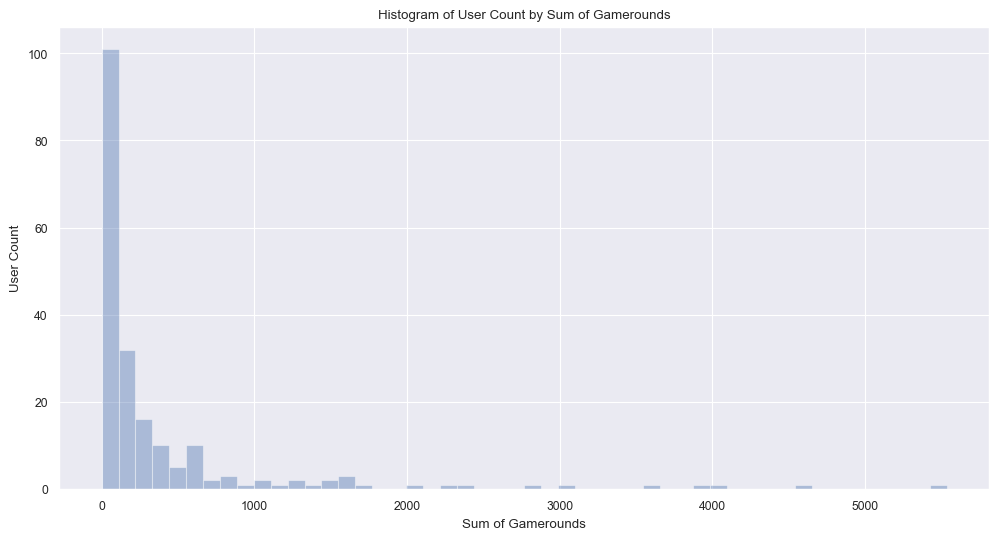

In [89]:
# Graph
plot_df = df.groupby('sum_gamerounds')['userid'].count().reset_index()


# create a histogram using seaborn
sns.set_context('paper')
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))


ax = sns.distplot(plot_df[:101], kde=False)

# set the X-label and Y-label
ax.set_xlabel("Sum of Gamerounds")
ax.set_ylabel("User Count")

# set the plot title
ax.set_title("Histogram of User Count by Sum of Gamerounds")

plt.show()

The visualization displayed above reveals that there are players who download the game but do not engage with it at all (0 game rounds). Moreover, there are players who participate in a few game rounds during their initial week, whereas others become highly invested in the game.


The primary objective is to make our game enjoyable and engaging for players, and to encourage them to continue playing. One of the most widely used metrics in the video gaming industry to measure the game's appeal and engagement is 1-day retention, which calculates the percentage of players who return and play the game again one day after they have installed it. The higher the 1-day retention rate, the easier it is to retain players and grow a large player base, indicating that players are enjoying the game and are likely to continue playing. Therefore, increasing the 1-day retention rate is a key goal for our game.

For this reason, the next step is to analyze the minimum 1-day retention overall.

###  1-day retention analysis

In [90]:
# Total players who played at least 1 day
print(df['retention_1'].sum())

# Total of players
print(df['retention_1'].count())

# The % of users that came back the day after they installed.
df['retention_1'].sum() / df['retention_1'].count()

40153
90189


0.4452095044850259

With a 1-day retention rate of 0.44, less than half of the players returned to play the game one day after installation. This provides us with a benchmark to evaluate the effectiveness of any changes or interventions to increase the retention rate.

Next step, it is examine how 1-day retention rate differs between the two AB-groups. By comparing the retention rates between the two groups, we can determine if the changes made to the game have had a significant impact on player engagement and retention. This analysis will help to identify which group performed better in terms of retention and provide insights to improve the game's overall appeal and engagement.

In [91]:
# Calculating 1-day retention for each AB-group
df.groupby('version')['retention_1'].sum() / df.groupby('version')['userid'].count()

version
gate_30    0.448188
gate_40    0.442283
dtype: float64

The data above suggests that moving the gate to level 40 resulted in a slight decrease in 1-day retention compared to the control at level 30. While the change may seem small, it can have a significant impact. However, it is important to determine how confident we can be that a gate at level 40 will continue to have worse retention in the future.

One way to assess the certainty of the retention numbers is through bootstrapping. This involves repeatedly resampling the dataset with replacement and calculating 1-day retention for each sample. By analyzing the variation in retention, we can estimate the level of uncertainty in our results.

It is crucial to determine the confidence level of the retention data before making any decisions based on it. Bootstrapping can provide valuable insights into the potential variability of the retention numbers, allowing for more informed decision-making.

<AxesSubplot:ylabel='Density'>

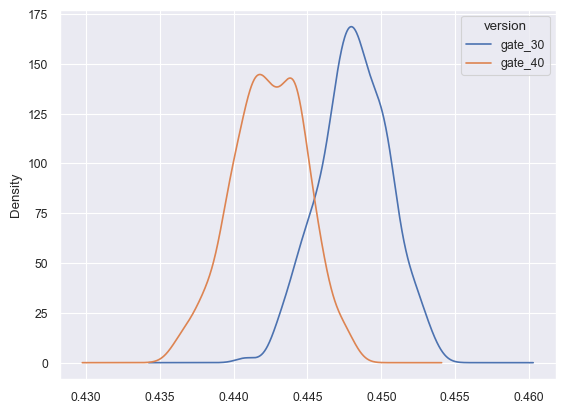

In [92]:
# Creating an list with bootstrapped means for each AB-group
boot_1d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_1d.plot(kind='kde')

plt.show()

In [93]:
# AB-groups.
boot_1d.head()

version,gate_30,gate_40
retention_1,0.445515,0.445941
retention_1,0.446581,0.442073
retention_1,0.443821,0.442839
retention_1,0.448190,0.440396
retention_1,0.450297,0.442485


In [94]:
# % difference in 1-day retention between the two AB-groups.
boot_1d['diff'] = (boot_1d['gate_30'] - boot_1d['gate_40']) / boot_1d['gate_40'] * 100
boot_1d.head()

version,gate_30,gate_40,diff
retention_1,0.445515,0.445941,-0.095514
retention_1,0.446581,0.442073,1.019910
retention_1,0.443821,0.442839,0.221838
retention_1,0.448190,0.440396,1.769767
retention_1,0.450297,0.442485,1.765487


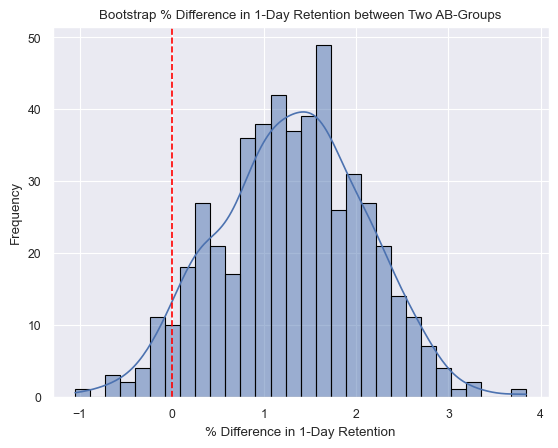

In [100]:
# Plot the bootstrap % difference in 1-day retention between the two AB-groups
sns.histplot(boot_1d['diff'], bins=30, edgecolor='black', kde= True)
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('% Difference in 1-Day Retention')
plt.ylabel('Frequency')
plt.title('Bootstrap % Difference in 1-Day Retention between Two AB-Groups')
plt.show()

Based on the histogram, it appears that the most likely % difference in 1-day retention between the two AB-groups is around 1-2%. Additionally, the majority of the distribution is above 0%, indicating that there is a higher probability that a gate at level 30 is associated with better 1-day retention. To determine the exact probability of the difference being above 0%, it is possible to calculate the proportion of bootstrap samples where the % difference is greater than 0%. This proportion can be interpreted as the estimated probability that the true % difference is greater than 0%.

In [101]:
# Calculating the probability that 1-day retention  is greater when the gate is at level 30.
prob = (boot_1d['diff'] > 0).sum() / len(boot_1d)

# Pretty printing the probability
'{:.1%}'.format(prob)

'95.4%'

Based on the bootstrap analysis, it appears highly probable that setting the gate at level 30 would result in better 1-day retention. However, it is important to note that the majority of players may not have reached level 30 yet, given that they have only been playing for one day. Thus, even if the gate is set at level 30, it may not have an impact on many players' retention since they haven't reached that stage of the game yet.

###  7-day retention analysis

In [102]:
# Calculating 7-day retention for each AB-group
df.groupby('version')['retention_7'].sum() / df.groupby('version')['userid'].count()

version
gate_30    0.190201
gate_40    0.182000
dtype: float64

Similar to the findings for 1-day retention, our analysis reveals that when the gate is set at level 40, the 7-day retention rate drops slightly (18.2%) compared to when the gate is at level 30 (19.0%). This difference is more pronounced than what we observed for 1-day retention, likely due to the fact that more players would have had sufficient time to encounter the gate at level 40. Additionally, we noted that the overall 7-day retention rate is lower compared to the 1-day retention rate, indicating that a smaller proportion of players continue playing the game a week after installing it.

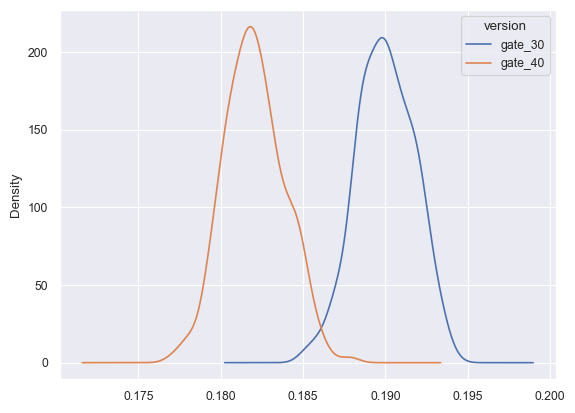

In [108]:
# Creating an list with bootstrapped means for each AB-group
boot_7d = []
for i in range(500):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_7d = pd.DataFrame(boot_7d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
boot_7d.plot(kind='kde')

plt.show()

In [109]:
# % difference in 7-day retention between the two AB-groups.
boot_7d['diff'] = (boot_7d['gate_30'] - boot_7d['gate_40']) / boot_7d['gate_40'] * 100
boot_7d.head()

version,gate_30,gate_40,diff
retention_7,0.187962,0.181175,3.745779
retention_7,0.192330,0.182959,5.122228
retention_7,0.190946,0.182103,4.856102
retention_7,0.186986,0.182437,2.493586
retention_7,0.188429,0.183976,2.420339


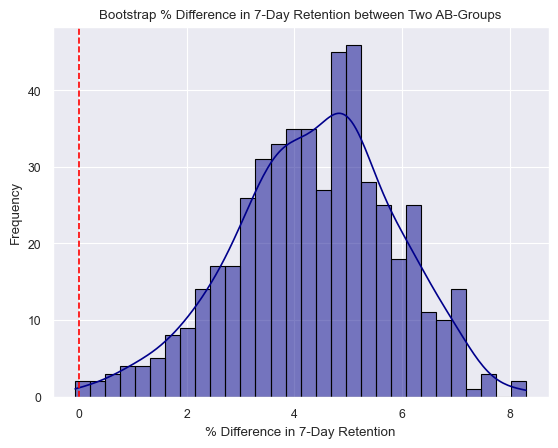

In [124]:
# Plot the bootstrap % difference in 1-day retention between the two AB-groups
sns.set_context('paper')
sns.set_style('darkgrid')

sns.histplot(boot_7d['diff'], bins=30, edgecolor='black', kde= True, color = 'darkblue')

plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('% Difference in 7-Day Retention')
plt.ylabel('Frequency')
plt.title('Bootstrap % Difference in 7-Day Retention between Two AB-Groups')
plt.show()

In [123]:
# Calculating the probability that 7-day retention  is greater when the gate is at level 30.
prob = (boot_7d['diff'] > 0).sum() / len(boot_1d)

# Pretty printing the probability
'{:.1%}'.format(prob)

'99.8%'

# Conclusion

Based on the results of the bootstrap analysis, it appears that setting the gate at level 30 leads to higher 7-day retention rates compared to setting it at level 40. Therefore, to maintain high retention rates, it is advisable not to switch the gate from level 30 to level 40. While other metrics such as the number of game rounds played or in-game purchases can also be considered, retention is crucial as it determines the player base should be retained. Ultimately, even if players spend money in the game if they don't stick around, it won't make a significant impact on the game's success.